In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astroquery.sdss import SDSS
from src import jpas_sdss
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.io import fits
import requests
from io import BytesIO
import os
from bs4 import BeautifulSoup


# Load JPAS

In [2]:
df_jpas = pd.read_csv('./data/merged3.csv')

In [3]:
df_jpas.ALPHA_J2000.min(), df_jpas.ALPHA_J2000.max(), df_jpas.DELTA_J2000.min(), df_jpas.DELTA_J2000.max()

(213.168920552, 215.98586814, 51.8180267143, 53.5396054378)

In [4]:
cond_spec = df_jpas['specObjID'] > 0
jpas_spec = df_jpas[cond_spec]
# jpas_spec['specObjID'].to_csv('../data/specObjID.csv', index=False)
jpas_spec.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol', 'field',
       'specObjID', 'jpas_idx', 'sep2d', 'sdss_idx', 'TILE_ID', 'NUMBER',
       'ALPHA_J2000', 'DELTA_J2000', 'hpix11', 'X_IMAGE', 'Y_IMAGE', 'R_EFF',
       'FWHM_WORLD', 'A_WORLD', 'B_WORLD', 'THETA_J2000', 'ISOAREA_WORLD',
       'RELERRA_WORLD', 'RELERRB_WORLD', 'ERRTHETA_J2000', 'CLASS_STAR',
       'FLUX_AUTO', 'FLUX_ISO', 'FLUX_PETRO', 'FLUX_MAX_ARCSEC2',
       'PETRO_RADIUS', 'KRON_RADIUS', 'FLUX_APER_0_8', 'FLUX_APER_1_0',
       'FLUX_APER_1_2', 'FLUX_APER_1_5', 'FLUX_APER_2_0', 'FLUX_APER_3_0',
       'FLUX_APER_4_0', 'FLUX_APER_6_0', 'FLUX_RELERR_AUTO', 'FLUX_RELERR_ISO',
       'FLUX_RELERR_PETRO', 'FLUX_RELERR_APER_0_8', 'FLUX_RELERR_APER_1_0',
       'FLUX_RELERR_APER_1_2', 'FLUX_RELERR_APER_1_5', 'FLUX_RELERR_APER_2_0',
       'FLUX_RELERR_APER_3_0', 'FLUX_RELERR_APER_4_0', 'FLUX_RELERR_APER_6_0',
       'FLAGS', 'NORM_WMAP_VAL', 'MASK_FLAGS', 'SINGLE_DETECT',
       'FLUX_ISO_WORSTPSF', '

# Load SDSS

In [5]:
df = pd.read_csv('./data/sdss_info.csv', comment='#')
cond_spec = df['specObjID'] > 0
df_spec = df[cond_spec]
df_spec


specObjID   class               subClass         z      zErr  \
0    1176654783688239104  GALAXY                    NaN  0.085318  0.000036   
1    1176664954170796032  GALAXY            STARFORMING  0.075568  0.000010   
2    1176666603438237696    STAR                     F5 -0.000528  0.000020   
3    1176667153194051584  GALAXY                    NaN  0.236781  0.000061   
4    1176668252705679360  GALAXY            STARFORMING  0.073042  0.000010   
..                   ...     ...                    ...       ...       ...   
929  8263245356365797376     QSO              BROADLINE  1.248047  0.000734   
930  8263246160665532416     QSO                    NaN  1.698755  0.001122   
931  8263246436382300160     QSO  STARFORMING BROADLINE  0.511455  0.000039   
932  8263247005633239040     QSO              BROADLINE  1.572382  0.000811   
933  8263247810771834880     QSO              BROADLINE  1.595182  0.000851   

    survey sourceType  
0     sdss     GALAXY  
1     sdss     GALAXY  
2     sdss     GALAXY  
3     sdss     GALAXY  
4     sdss     GALAXY  
..     ...        ...  
929   boss   RM_TILE2  
930   boss   RM_TILE2  
931   boss   RM_TILE1  
932   boss   RM_TILE2  
933   boss   RM_TILE2  

[934 rows x 7 columns]

In [114]:
df_spec.value_counts('class')

class
GALAXY    514
STAR      238
QSO       182
Name: count, dtype: int64

In [115]:
df_spec.value_counts(['class', 'subClass'])

class   subClass         
QSO     BROADLINE            107
STAR    M5III (221615)        34
GALAXY  STARBURST             32
        STARFORMING           30
STAR    M4.5:III (123657)     24
                            ... 
        A8V (155514)           1
        G9IV (100030)          1
        K0IV (191026)          1
        K1IVa (142091)         1
        sdF3 (140283)          1
Name: count, Length: 67, dtype: int64

## Merge

In [116]:
df_merged = pd.merge(jpas_spec, df_spec, on='specObjID', how='inner')
# df_merged


In [139]:
cond = (df_merged['class'] == 'QSO') # & (df_merged['subClass'] == 'BROADLINE') & (df_merged['r'] < 19)
df_qso = df_merged[cond]
df_qso

cond = (df_merged['class'] == 'QSO') & (df_merged['subClass'] == 'BROADLINE') # & (df_merged['r'] < 19)
df_qso_broad = df_merged[cond]
df_qso_broad

cond = (df_merged['class'] == 'GALAXY') # & (df_merged['subClass'] == 'BROADLINE') & (df_merged['r'] < 19)
df_galaxy = df_merged[cond]
df_galaxy

objid          ra        dec         u         g         r  \
1    1237659120396075626  213.356396  52.064137  25.70062  23.49796  21.09322   
2    1237659120396075654  213.391388  52.036163  21.38392  21.94886  21.27552   
3    1237659120396075698  213.455232  52.011906  24.30660  21.80434  20.10044   
5    1237659120396140890  213.589204  51.956450  24.53024  22.08811  21.27702   
6    1237659120396141188  213.547916  51.962712  25.00867  23.10391  21.70091   
..                   ...         ...        ...       ...       ...       ...   
927  1237661417139667254  215.862126  53.161449  23.50511  22.92684  20.82569   
928  1237661417139404969  215.097246  53.312421  20.24143  18.22910  17.10847   
929  1237661417139667810  215.923413  53.165071  22.64516  23.33676  21.73841   
930  1237661417139535932  215.557554  53.229940  23.94888  21.40876  19.52385   
933  1237661417139601523  215.673968  53.106136  18.78574  17.65990  17.03474   

            i       z_x   run  camcol  ...  \
1    19.83593  18.99952  3177       5  ...   
2    20.72769  21.67557  3177       5  ...   
3    18.97817  18.37750  3177       5  ...   
5    20.74278  20.33034  3177       5  ...   
6    20.42208  20.00050  3177       5  ...   
..        ...       ...   ...     ...  ...   
927  19.68836  19.30474  3712       3  ...   
928  16.68071  16.32903  3712       3  ...   
929  20.71141  20.26174  3712       3  ...   
930  18.89076  18.58686  3712       3  ...   
933  16.67522  16.47555  3712       3  ...   

                                           FLUX_PSFCOR  \
1    0.0 22.2296371 29.8168316 4.64865351 0.0 0.0 1...   
2    29.3227081 0.0 33.3626175 31.2345238 0.0 0.0 6...   
3    0.0 7.76282978 0.0 0.0 0.0 0.0 2.72001028 28.9...   
5    7.9136548 13.6347857 47.7242851 16.3995247 47....   
6    0.0 21.5719147 9.39022255 0.0 41.010479 4.1916...   
..                                                 ...   
927  0.0 19.2303238 3.17773938 0.0 33.5341682 9.270...   
928  416.377289 643.770935 622.8479 646.519287 687....   
929  41.8796425 15.3310261 0.0 24.2584743 43.418838...   
930  16.3746185 0.0 36.8107796 66.1450043 84.130439...   
933  1155.16199 1298.57605 1286.64307 1347.93311 13...   

                                    FLUX_RELERR_PSFCOR  \
1    0.0 1.711914 0.422607 3.429688 0.0 0.0 0.86474...   
2    0.812988 0.0 0.42041 0.485107 0.0 0.0 0.210449...   
3    0.0 7.523438 0.0 0.0 0.0 0.0 7.742188 0.47876 ...   
5    1.55957 2.238281 0.158203 0.421631 0.40625 0.7...   
6    0.0 1.516602 0.963379 0.0 0.566895 5.984375 0....   
..                                                 ...   
927  0.0 1.142578 2.808594 0.0 0.35083 2.369141 0.5...   
928  0.097229 0.075806 0.035217 0.052246 0.041473 0...   
929  0.479004 1.501953 0.0 0.624512 0.28418 0.0 1.3...   
930  1.633789 0.0 0.368408 0.325684 0.212891 0.3090...   
933  0.036652 0.038696 0.018127 0.026352 0.02272 0....   

                                   FLUX_APER3_WORSTPSF  \
1    -11.8461037 16.6670895 23.1551571 7.85276508 -...   
2    25.431673 13.0564499 13.9432278 37.3528786 -4....   
3    11.1333599 -19.2299309 6.74546528 -6.88288212 ...   
5    -10.2377577 20.5755615 51.6785774 34.0586586 5...   
6    6.29019642 8.44458008 3.43998456 -9.7018137 35...   
..                                                 ...   
927  -3.87792158 19.3230972 6.78496742 -7.79535484 ...   
928  191.621887 330.640167 317.856049 333.46756 356...   
929  29.939043 1.96896517 -2.66462159 13.1519375 39...   
930  -6.87612247 -11.0790129 30.5686646 52.6780815 ...   
933  560.737732 638.816895 612.138062 599.496155 60...   

                            FLUX_RELERR_APER3_WORSTPSF   class     subClass  \
1    -1.022461 1.830078 0.354736 1.542969 -8.976562...  GALAXY          NaN   
2    0.618164 2.353516 0.619141 0.325928 -4.4375 -0...  GALAXY          NaN   
3    1.158203 -1.711914 1.27832 -1.779297 -0.500977...  GALAXY          NaN   
5    -1.301758 1.554688 0.156616 0.343994 0.334961 ...  GALAXY    STARBURST   
6    2.

In [130]:
df_qso.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z_x', 'run', 'camcol',
       'field', 'specObjID', 'jpas_idx', 'sep2d', 'sdss_idx', 'TILE_ID',
       'NUMBER', 'ALPHA_J2000', 'DELTA_J2000', 'hpix11', 'X_IMAGE', 'Y_IMAGE',
       'R_EFF', 'FWHM_WORLD', 'A_WORLD', 'B_WORLD', 'THETA_J2000',
       'ISOAREA_WORLD', 'RELERRA_WORLD', 'RELERRB_WORLD', 'ERRTHETA_J2000',
       'CLASS_STAR', 'FLUX_AUTO', 'FLUX_ISO', 'FLUX_PETRO', 'FLUX_MAX_ARCSEC2',
       'PETRO_RADIUS', 'KRON_RADIUS', 'FLUX_APER_0_8', 'FLUX_APER_1_0',
       'FLUX_APER_1_2', 'FLUX_APER_1_5', 'FLUX_APER_2_0', 'FLUX_APER_3_0',
       'FLUX_APER_4_0', 'FLUX_APER_6_0', 'FLUX_RELERR_AUTO', 'FLUX_RELERR_ISO',
       'FLUX_RELERR_PETRO', 'FLUX_RELERR_APER_0_8', 'FLUX_RELERR_APER_1_0',
       'FLUX_RELERR_APER_1_2', 'FLUX_RELERR_APER_1_5', 'FLUX_RELERR_APER_2_0',
       'FLUX_RELERR_APER_3_0', 'FLUX_RELERR_APER_4_0', 'FLUX_RELERR_APER_6_0',
       'FLAGS', 'NORM_WMAP_VAL', 'MASK_FLAGS', 'SINGLE_DETECT',
       'FLUX_ISO_WORSTPSF',

In [131]:
cond = df_qso['sep2d'] < 1
df_qso[cond] 

objid          ra        dec         u         g         r  \
0    1237659120396075265  213.349805  52.063320  22.39950  21.84116  21.48263   
4    1237659120396140736  213.571361  51.956279  20.99424  20.47704  20.43086   
14   1237659120396075137  213.541066  52.027018  20.03336  19.93775  19.95577   
23   1237659120933012060  213.986999  52.268662  22.16433  21.95655  21.48251   
25   1237659120396075549  213.578777  52.068333  22.55456  22.22909  21.47172   
..                   ...         ...        ...       ...       ...       ...   
913  1237661417139405061  215.099504  53.268073  20.76871  20.39384  20.24555   
919  1237661417139470406  215.135962  53.273422  19.77532  19.36974  19.27914   
920  1237661417139470521  215.203598  53.357842  21.97353  21.61929  21.23017   
921  1237661417139470525  215.106592  53.184793  21.74799  21.68454  21.64227   
931  1237661417139536033  215.558690  53.254664  21.24005  21.22499  21.15645   

            i       z_x   run  camcol  ...  \
0    21.25299  20.81412  3177       5  ...   
4    20.23825  20.14130  3177       5  ...   
14   19.62774  19.64699  3177       5  ...   
23   21.26206  21.29520  3177       6  ...   
25   20.95501  20.54313  3177       5  ...   
..        ...       ...   ...     ...  ...   
913  20.09821  19.85997  3712       3  ...   
919  19.35146  19.38924  3712       3  ...   
920  20.85943  21.13650  3712       3  ...   
921  21.40104  21.84530  3712       3  ...   
931  20.62183  20.74698  3712       3  ...   

                                           FLUX_PSFCOR  \
0    31.7886848 12.9435368 40.312439 8.34628487 53....   
4    123.669014 89.6180267 82.678894 46.2377052 96....   
14   344.617279 358.575531 300.170074 187.879089 36...   
23   147.840134 144.170959 115.083122 53.9966774 56...   
25   20.7516289 71.040451 36.4035301 16.4608593 23....   
..                                                 ...   
913  333.273895 291.213898 300.426575 245.863312 28...   
919  650.614929 673.724609 695.504272 597.15625 548...   
920  52.7589417 10.1458454 43.9452667 18.9534626 28...   
921  72.5980377 57.4818916 47.9736099 0.0 22.490501...   
931  406.68927 327.164734 223.589523 174.821732 186...   

                                    FLUX_RELERR_PSFCOR  \
0    0.372803 2.535156 0.195679 0.836426 0.382324 0...   
4    0.108215 0.338867 0.111389 0.202148 0.229614 0...   
14   0.052063 0.0979 0.033264 0.047424 0.061218 0.0...   
23   0.086426 0.224243 0.073242 0.138794 0.356934 0...   
25   0.585449 0.436523 0.213135 0.447754 0.865723 0...   
..                                                 ...   
913  0.066589 0.089355 0.04068 0.071777 0.05368 0.1...   
919  0.033203 0.039642 0.017532 0.03006 0.025726 0....   
920  0.292236 1.9375 0.154297 0.629883 0.433838 0.3...   
921  0.26709 0.370605 0.170044 0.0 0.463867 0.48461...   
931  0.048615 0.071716 0.039276 0.080383 0.059357 0...   

                                   FLUX_APER3_WORSTPSF  \
0    35.2775574 40.0073471 38.5966949 33.6596642 33...   
4    109.173309 87.891861 74.149498 51.4268379 71.2...   
14   354.186401 384.944397 313.553986 300.310059 33...   
23   149.639191 104.014557 106.049347 82.3061829 89...   
25   32.0699348 64.009201 33.5370064 20.2034321 33....   
..                                                 ...   
913  311.174835 269.772552 269.478119 236.999039 26...   
919  744.102356 756.52002 705.64325 697.093262 617....   
920  66.4262009 22.1633587 36.7185097 53.8712502 36...   
921  39.4247818 40.6532288 47.2928619 14.1475077 36...   
931  464.308258 368.079437 241.322144 194.568771 22...   

                            FLUX_RELERR_APER3_WORSTPSF  class   subClass  \
0    0.368896 0.768555 0.213867 0.359375 0.67041 0....    QSO        NaN   
4    0.107483 0.344727 0.116882 0.215698 0.293945 0...    QSO  BROADLINE   
14   0.048065 0.081665 0.030548 0.042633 0.065857 0...    QSO  BROADLINE   
23   0.083801 0.2854 0.079834 0.141479 0.23645 0.26...    QSO        NaN   
25   0.377197 0.487061

## Get Imagges

In [13]:
for i, row in df_qso.iterrows():
    ra, dec = row['ALPHA_J2000'], row['DELTA_J2000']
    url = ("https://archive.cefca.es/catalogues/vo/siap/minijpas-pdr201912/get_graphic_cutout?band=RGB&" +
           f"ra={ra}&dec={dec}&width=0.002&height=0.002&sizex=100&sizey=100")
    while True:
       r = requests.get(url)
       if r.status_code == 200:
           break
       
    img = plt.imread(BytesIO(r.content))
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(f'./figs/sdss_qso/{row["jpas_idx"]} RA: {ra:.4f} DEC: {dec:.4f}.png')
    plt.close()

## Make mosaic

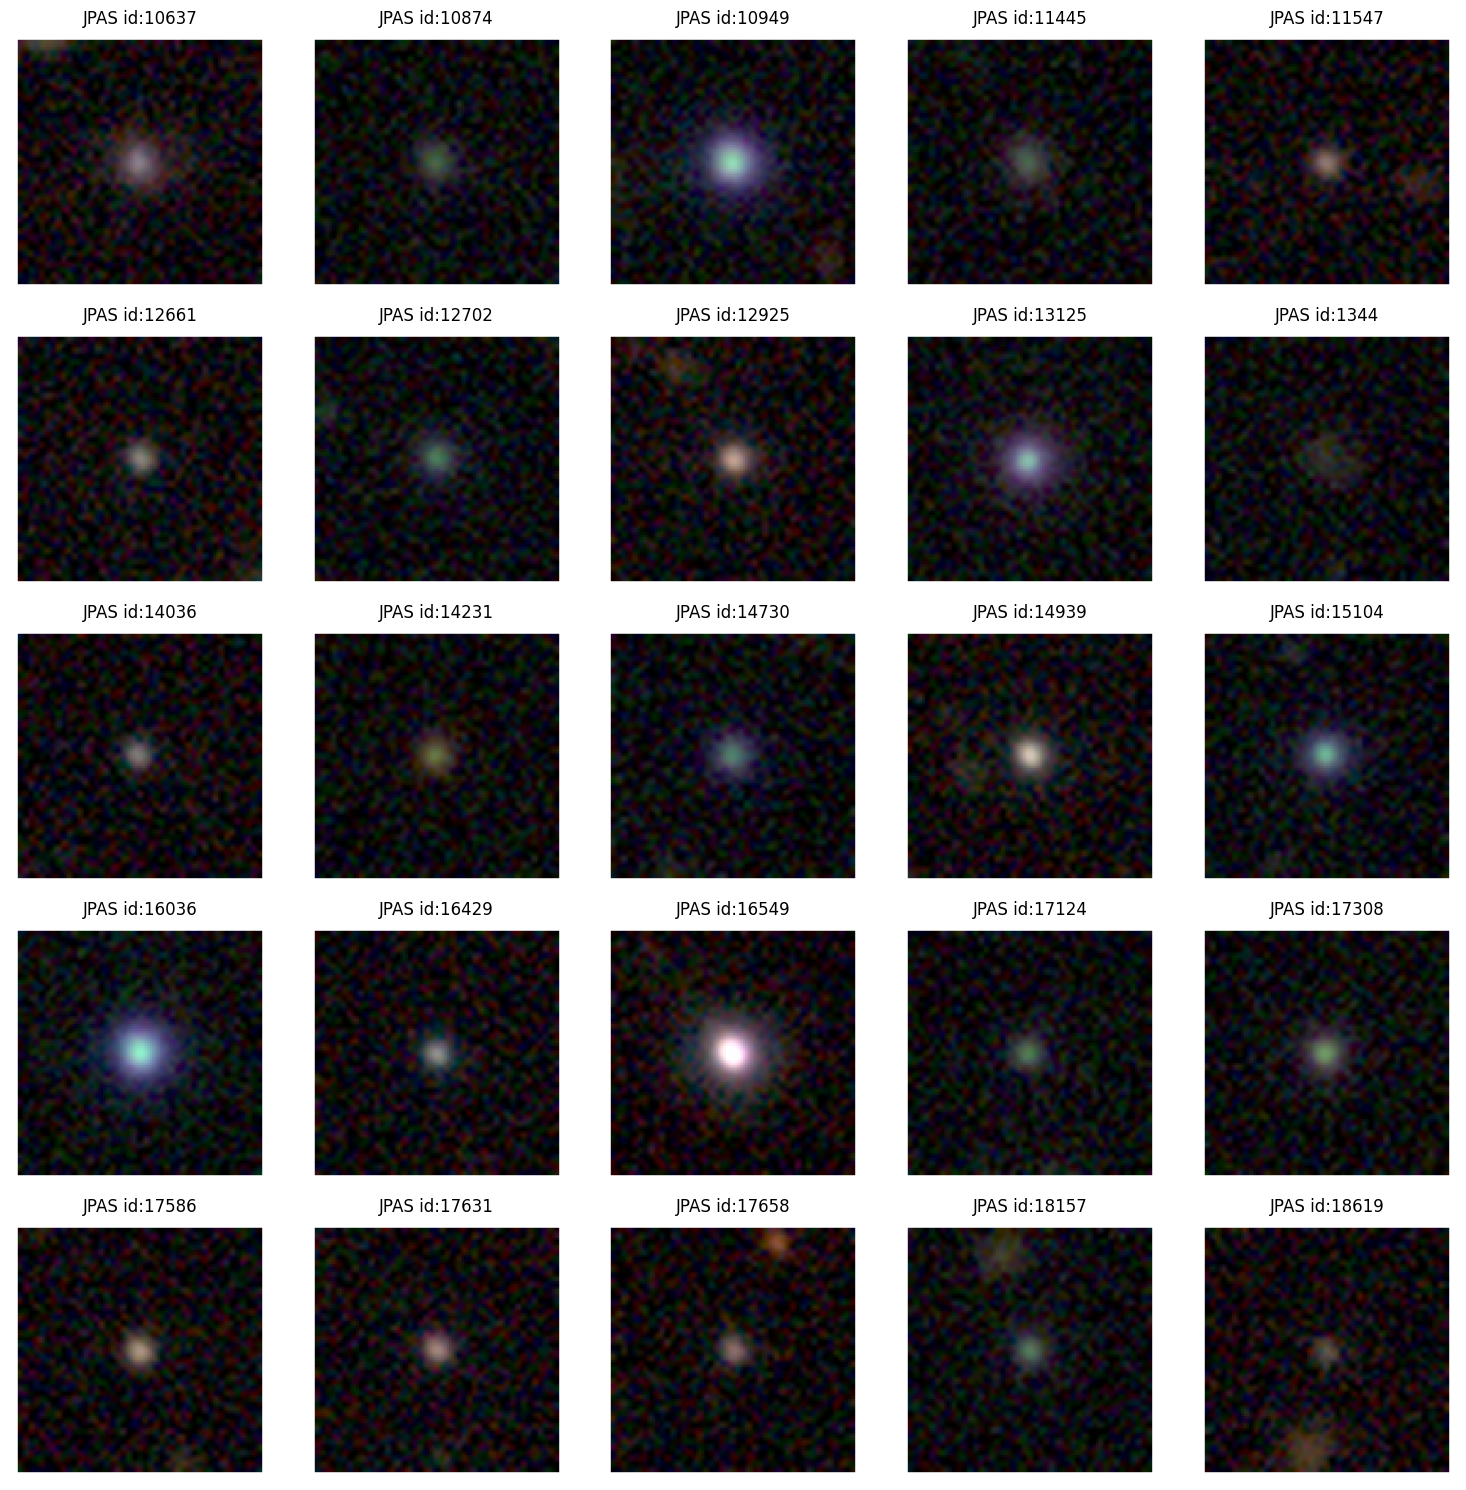

In [147]:
scan = os.scandir('./figs/sdss_qso/')
files = [f.path for f in scan if f.name.endswith('.png')]
files.sort()

bad_list = [18]
fig, axs = plt.subplots(5, 5, figsize=(15, 15))
count = 0
for i, ax in enumerate(axs.flat):
    while count in bad_list:
        count += 1
    img = plt.imread(files[count])
    ax.imshow(img)
    # ax.hlines(75, 100, 200, 'w', lw=2)
    ax.axis('off')
    # ax.title.set_text(f"{count} {files[count].split('/')[-1].split(' ')[0]}")
    ax.title.set_text(f"JPAS id:{files[count].split('/')[-1].split(' ')[0]}")
    count += 1
plt.tight_layout()
plt.savefig('./figs/sdss_quasars.png')
plt.show()

## show spectra

Loading 25943_8264186519914567680.fits


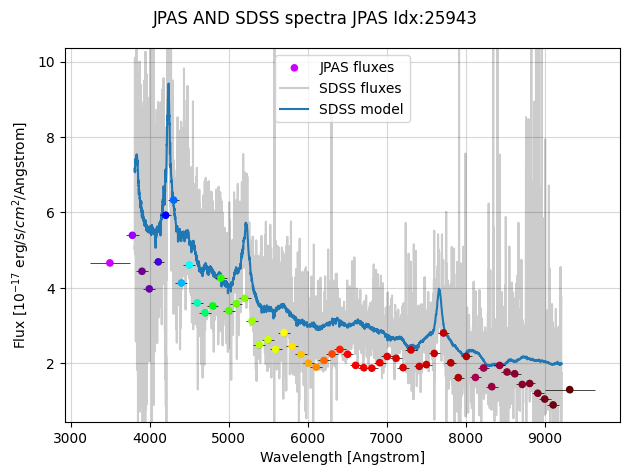

Redshift: 1.743377
Loading 19880_8264374261525010432.fits


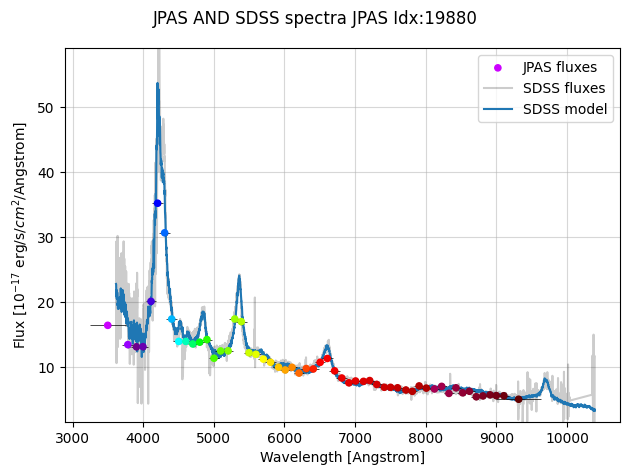

Redshift: 2.46264
Loading 35490_8263046325719029760.fits


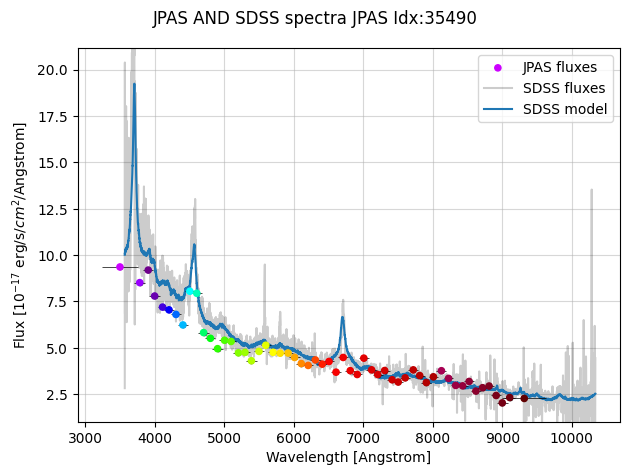

Redshift: 1.393938
Loading 47987_8264177174065731584.fits


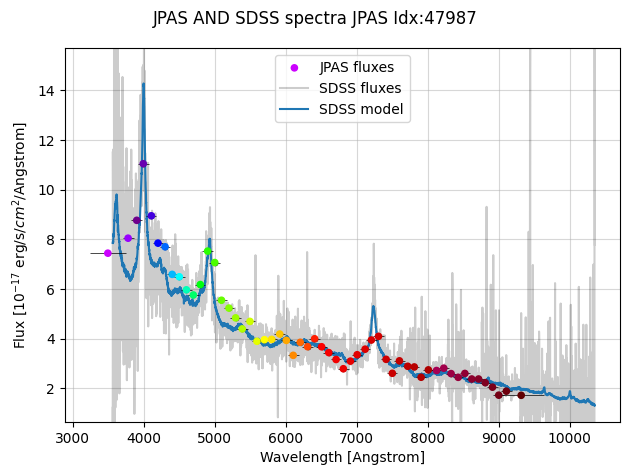

Redshift: 1.584336
Loading 41256_8261922647115585536.fits


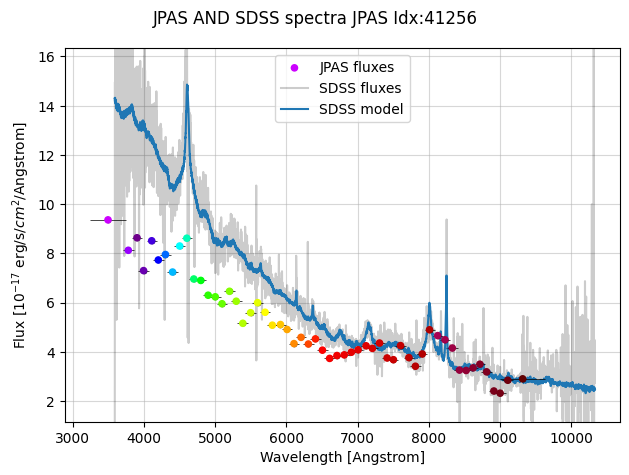

Redshift: 0.646646


In [69]:
idx = 0
couunt = 0
while couunt < 5:
    row = df_qso.iloc[idx]
    r_mag = row['r']
    if r_mag < 20:
        jpas_sdss.plot_jpas_spec(row)
        print(f"Redshift: {row['z_y']}")
        couunt += 1
    idx += 1


# Load photo redshift

In [120]:
df_Lephare_PhotoZ = pd.read_csv('./data/Lephare_PhotoZ_updated.csv', comment='#')
df_Lephare_PhotoZ

TILE_ID  NUMBER  PHOTOZ  PHOTOZ_ERR  \
0         2406      37   0.964     0.37100   
1         2406      38   1.216     0.09320   
2         2406      40   1.086     0.03785   
3         2406      41   0.348     0.11660   
4         2406      43   0.818     0.25415   
...        ...     ...     ...         ...   
40444     2241   20885   0.806     0.10500   
40445     2241   20886   1.146     0.07205   
40446     2241   20888   0.034     0.02920   
40447     2241   20895   1.056     0.17795   
40448     2241   20902   1.162     0.45205   

                                              SPARSE_PDF    Z_ML  \
0      75863875 564515154 673669483 -262040640 122322...  1.0002   
1      127842543 1197459331 714386674 583189479 -3424...  1.1338   
2      158970432 925282947 790801143 702921990 264549...  1.0994   
3      147408161 333854673 -210555143 169236727 88240...  0.4664   
4      81891087 530563798 388785412 -179529907 190085...  0.8433   
...                                                  ...     ...   
40444  159746225 -152470010 159548311 143947470 16433...  0.8196   
40445  164936557 674670939 194877786 -335234965 -3004...  1.1418   
40446  128845983 1688208707 836048050 904924283 -3415...  0.0774   
40447  91007311 372236016 246309234 222669565 1765908...  1.0393   
40448  60998039 1112110959 930408057 434870957 246768...  0.9769   

       Z_BEST68_HIGH  Z_BEST68_LOW    CHI_BEST      ODDS  
0             1.2835        0.5415    4.338760  0.164880  
1             1.2226        1.0362  161.942993  0.375752  
2             1.1117        1.0360  134.257996  0.793189  
3             0.5450        0.3118   81.358101  0.326095  
4             1.1571        0.6488    5.470090  0.188776  
...              ...           ...         ...       ...  
40444         0.9211        0.7111   15.601800  0.442272  
40445         1.1680        1.0239   55.970600  0.516478  
40446         0.0825        0.0241   48.785999  0.532774  
40447         1.1785        0.8226    9.577100  0.253629  
40448         1.4875        0.5834   10.402400  0.170050  

[40449 rows x 10 columns]

In [121]:
df_qso.columns, df_Lephare_PhotoZ.columns

(Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z_x', 'run', 'camcol',
        'field', 'specObjID', 'jpas_idx', 'sep2d', 'sdss_idx', 'TILE_ID',
        'NUMBER', 'ALPHA_J2000', 'DELTA_J2000', 'hpix11', 'X_IMAGE', 'Y_IMAGE',
        'R_EFF', 'FWHM_WORLD', 'A_WORLD', 'B_WORLD', 'THETA_J2000',
        'ISOAREA_WORLD', 'RELERRA_WORLD', 'RELERRB_WORLD', 'ERRTHETA_J2000',
        'CLASS_STAR', 'FLUX_AUTO', 'FLUX_ISO', 'FLUX_PETRO', 'FLUX_MAX_ARCSEC2',
        'PETRO_RADIUS', 'KRON_RADIUS', 'FLUX_APER_0_8', 'FLUX_APER_1_0',
        'FLUX_APER_1_2', 'FLUX_APER_1_5', 'FLUX_APER_2_0', 'FLUX_APER_3_0',
        'FLUX_APER_4_0', 'FLUX_APER_6_0', 'FLUX_RELERR_AUTO', 'FLUX_RELERR_ISO',
        'FLUX_RELERR_PETRO', 'FLUX_RELERR_APER_0_8', 'FLUX_RELERR_APER_1_0',
        'FLUX_RELERR_APER_1_2', 'FLUX_RELERR_APER_1_5', 'FLUX_RELERR_APER_2_0',
        'FLUX_RELERR_APER_3_0', 'FLUX_RELERR_APER_4_0', 'FLUX_RELERR_APER_6_0',
        'FLAGS', 'NORM_WMAP_VAL', 'MASK_FLAGS', 'SINGLE_DETECT',
        'FLUX_

In [136]:
df = pd.merge(df_qso, df_Lephare_PhotoZ, on=['TILE_ID', 'NUMBER'], how='inner')
df

objid          ra        dec         u         g         r  \
0    1237659120396075265  213.349805  52.063320  22.39950  21.84116  21.48263   
1    1237659120396140736  213.571361  51.956279  20.99424  20.47704  20.43086   
2    1237659120396075137  213.541066  52.027018  20.03336  19.93775  19.95577   
3    1237659120933012060  213.986999  52.268662  22.16433  21.95655  21.48251   
4    1237659120396075549  213.578777  52.068333  22.55456  22.22909  21.47172   
..                   ...         ...        ...       ...       ...       ...   
176  1237661417139404981  215.181995  53.368431  19.69112  19.34077  19.26306   
177  1237661417139470406  215.135962  53.273422  19.77532  19.36974  19.27914   
178  1237661417139470521  215.203598  53.357842  21.97353  21.61929  21.23017   
179  1237661417139470525  215.106592  53.184793  21.74799  21.68454  21.64227   
180  1237661417139536033  215.558690  53.254664  21.24005  21.22499  21.15645   

            i       z_x   run  camcol  ...  survey        sourceType  PHOTOZ  \
0    21.25299  20.81412  3177       5  ...    boss  QSO_EBOSS_W3_ADM   0.660   
1    20.23825  20.14130  3177       5  ...    boss          RM_TILE1   0.904   
2    19.62774  19.64699  3177       5  ...    boss          RM_TILE2   1.500   
3    21.26206  21.29520  3177       6  ...    boss  QSO_EBOSS_W3_ADM   0.604   
4    20.95501  20.54313  3177       5  ...    boss  QSO_EBOSS_W3_ADM   0.284   
..        ...       ...   ...     ...  ...     ...               ...     ...   
176  19.01319  18.94835  3712       3  ...    boss          RM_TILE2   0.050   
177  19.35146  19.38924  3712       3  ...    boss  QSO_EBOSS_W3_ADM   0.052   
178  20.85943  21.13650  3712       3  ...    boss  QSO_EBOSS_W3_ADM   0.156   
179  21.40104  21.84530  3712       3  ...    boss          RM_TILE2   1.416   
180  20.62183  20.74698  3712       3  ...    boss          RM_TILE2   0.956   

     PHOTOZ_ERR                                         SPARSE_PDF    Z_ML  \
0       0.16515  45903780 2097192999 1937599647 1362654671 7986...  0.6830   
1       0.01130  497259605 327848455 -131033357 -86339401 82222...  0.9014   
2       0.00030  1138554394 1112864198 325645681 39258250 18286...  1.4985   
3       0.00395  1053516403 -77373149 -216243262 -352362038 -35...  0.6006   
4       0.00235  63319707 2097163930 1800744516 1213345516 8353...  0.2836   
..          ...                                                ...     ...   
176     0.00015  1044711478 775882890 737282018 162990300 14824...  0.0500   
177     0.00030  1004800138 900532278 731777246 201459680 13775...  0.0518   
178     0.00500  775821891 -305063693 -122676922 -30270489 8373...  0.1628   
179     0.35210  45871274 2097188815 1866000383 1580043295 1030...  1.4234   
180     0.00085  234724571 2097192152 1225891116 867867780 3621...  0.9557   

     Z_BEST68_HIGH  Z_BEST68_LOW     CHI_BEST      ODDS  
0           0.9846        0.6543    30.244101  0.420638  
1           0.9130        0.8904   121.902000  0.961675  
2           1.5000        1.4994   489.002991  0.978259  
3           0.6049        0.5970    79.494202  0.999955  
4           0.2857        0.2810    30.664600  1.000000  
..             ...           ...          ...       ...  
176         0.0503        0.0500   763.921997  1.000000  
177         0.0522        0.0516  1432.140010  1.000000  
178         0.1653        0.1553    40.885399  0.931333  
179         1.5000        0.7958    40.875301  0.424666  
180         0.9569        0.9552   373.376007  0.903877  

[181 rows x 81 columns]

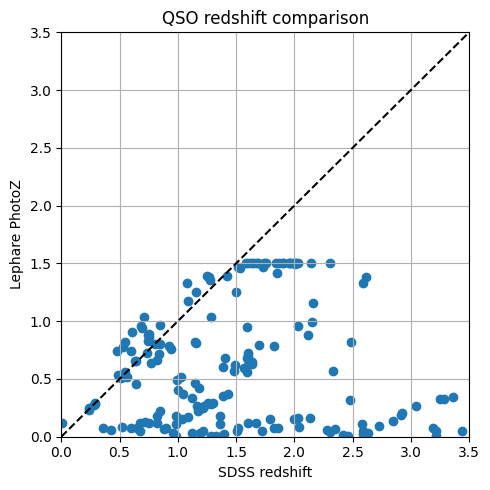

In [138]:
plt.figure(figsize=(5, 5))
plt.scatter(df['z_y'], df['PHOTOZ'])
plt.xlabel('SDSS redshift')
plt.ylabel('Lephare PhotoZ')
plt.plot([0, 3.5], [0, 3.5], 'k--')
plt.xlim(0, 3.5)
plt.ylim(0, 3.5)
plt.title('QSO redshift comparison')
plt.grid()
plt.tight_layout()
plt.savefig('./figs/qso_redshift_comparison.png')
plt.show()

In [141]:
df = pd.merge(df_qso_broad, df_Lephare_PhotoZ, on=['TILE_ID', 'NUMBER'], how='inner')
df

objid          ra        dec         u         g         r  \
0    1237659120396140736  213.571361  51.956279  20.99424  20.47704  20.43086   
1    1237659120396075137  213.541066  52.027018  20.03336  19.93775  19.95577   
2    1237661387068669979  215.775215  53.258066  18.84521  18.25810  18.21955   
3    1237661387068670166  215.750450  53.281887  21.40882  21.20498  20.71165   
4    1237661387068670171  215.787347  53.303246  21.72816  21.26383  20.60666   
..                   ...         ...        ...       ...       ...       ...   
101  1237661417139404940  214.967641  53.228039  22.32540  21.26729  21.13178   
102  1237661417139404977  215.043695  53.206626  20.79922  20.11383  20.07781   
103  1237661417139404981  215.181995  53.368431  19.69112  19.34077  19.26306   
104  1237661417139470525  215.106592  53.184793  21.74799  21.68454  21.64227   
105  1237661417139536033  215.558690  53.254664  21.24005  21.22499  21.15645   

            i       z_x   run  camcol  ...  survey  sourceType  PHOTOZ  \
0    20.23825  20.14130  3177       5  ...    boss    RM_TILE1   0.904   
1    19.62774  19.64699  3177       5  ...    boss    RM_TILE2   1.500   
2    18.22442  18.08350  3705       3  ...    boss    RM_TILE2   0.004   
3    20.83252  20.63440  3705       3  ...    boss    RM_TILE2   0.266   
4    20.25736  20.36916  3705       3  ...    boss    RM_TILE2   0.596   
..        ...       ...   ...     ...  ...     ...         ...     ...   
101  21.29480  20.91900  3712       3  ...    boss    RM_TILE1   0.066   
102  20.06151  19.85727  3712       3  ...    boss    RM_TILE2   0.050   
103  19.01319  18.94835  3712       3  ...    boss    RM_TILE2   0.050   
104  21.40104  21.84530  3712       3  ...    boss    RM_TILE2   1.416   
105  20.62183  20.74698  3712       3  ...    boss    RM_TILE2   0.956   

     PHOTOZ_ERR                                         SPARSE_PDF     Z_ML  \
0       0.01130  497259605 327848455 -131033357 -86339401 82222...   0.9014   
1       0.00030  1138554394 1112864198 325645681 39258250 18286...   1.4985   
2       0.00005  744882346 2097152087 -757989376 448921852 -646... -99.0000   
3       0.00090  9382823 2097163172 1371417592 1009920848 46118...   0.2662   
4       0.00225  175399455 2061984202 2097177116 262235663 1168...   0.6060   
..          ...                                                ...      ...   
101     0.00020  941755094 544213719 606014080 603458344 -12680...   0.0660   
102     0.00010  943982646 534513719 594086024 592512992 -12458...   0.0499   
103     0.00015  1044711478 775882890 737282018 162990300 14824...   0.0500   
104     0.35210  45871274 2097188815 1866000383 1580043295 1030...   1.4234   
105     0.00085  234724571 2097192152 1225891116 867867780 3621...   0.9557   

     Z_BEST68_HIGH  Z_BEST68_LOW     CHI_BEST      ODDS  
0           0.9130        0.8904   121.902000  0.961675  
1           1.5000        1.4994   489.002991  0.978259  
2           0.0040        0.0039  6321.089840  1.000000  
3           0.2671        0.2653    60.202599  0.998971  
4           0.5994        0.5949    76.046204  0.934839  
..             ...           ...          ...       ...  
101         0.0662        0.0658   180.759003  1.000000  
102         0.0501        0.0499   533.375977  1.000000  
103         0.0503        0.0500   763.921997  1.000000  
104         1.5000        0.7958    40.875301  0.424666  
105         0.9569        0.9552   373.376007  0.903877  

[106 rows x 81 columns]

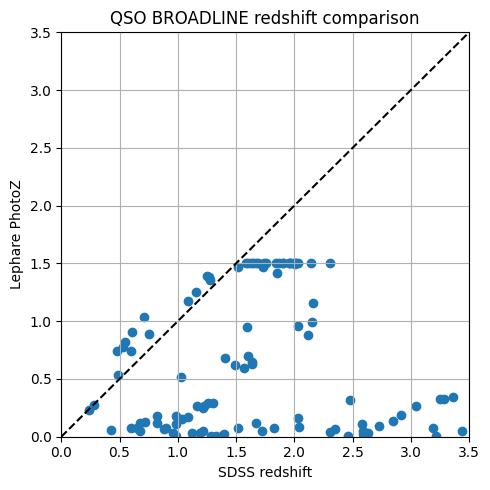

In [142]:
plt.figure(figsize=(5, 5))
plt.scatter(df['z_y'], df['PHOTOZ'])
plt.xlabel('SDSS redshift')
plt.ylabel('Lephare PhotoZ')
plt.plot([0, 3.5], [0, 3.5], 'k--')
plt.xlim(0, 3.5)
plt.ylim(0, 3.5)
plt.title('QSO BROADLINE redshift comparison')
plt.grid()
plt.tight_layout()
plt.savefig('./figs/qso_broad_redshift_comparison.png')
plt.show()

In [134]:
df = pd.merge(df_galaxy, df_Lephare_PhotoZ, on=['TILE_ID', 'NUMBER'], how='inner')
df

objid          ra        dec         u         g         r  \
0    1237659120396075626  213.356396  52.064137  25.70062  23.49796  21.09322   
1    1237659120396075654  213.391388  52.036163  21.38392  21.94886  21.27552   
2    1237659120396075698  213.455232  52.011906  24.30660  21.80434  20.10044   
3    1237659120396140890  213.589204  51.956450  24.53024  22.08811  21.27702   
4    1237659120396141188  213.547916  51.962712  25.00867  23.10391  21.70091   
..                   ...         ...        ...       ...       ...       ...   
507  1237661417139667254  215.862126  53.161449  23.50511  22.92684  20.82569   
508  1237661417139404969  215.097246  53.312421  20.24143  18.22910  17.10847   
509  1237661417139667810  215.923413  53.165071  22.64516  23.33676  21.73841   
510  1237661417139535932  215.557554  53.229940  23.94888  21.40876  19.52385   
511  1237661417139601523  215.673968  53.106136  18.78574  17.65990  17.03474   

            i       z_x   run  camcol  ...  survey        sourceType  PHOTOZ  \
0    19.83593  18.99952  3177       5  ...    boss               LRG   0.832   
1    20.72769  21.67557  3177       5  ...    boss         FAINT_ELG   0.602   
2    18.97817  18.37750  3177       5  ...    boss               LRG   0.684   
3    20.74278  20.33034  3177       5  ...    boss  QSO_EBOSS_W3_ADM   0.466   
4    20.42208  20.00050  3177       5  ...    boss     FAINT_HIZ_LRG   0.574   
..        ...       ...   ...     ...  ...     ...               ...     ...   
507  19.68836  19.30474  3712       3  ...    boss               LRG   0.566   
508  16.68071  16.32903  3712       3  ...    sdss            GALAXY   0.156   
509  20.71141  20.26174  3712       3  ...    boss     FAINT_HIZ_LRG   0.558   
510  18.89076  18.58686  3712       3  ...    boss               LRG   0.350   
511  16.67522  16.47555  3712       3  ...    sdss            GALAXY   0.152   

     PHOTOZ_ERR                                         SPARSE_PDF    Z_ML  \
0       0.01015  541493214 -213546457 -150305561 117147274 1162...  0.8272   
1       0.00850  488202869 156394774 -219323874 -216178064 1134...  0.5867   
2       0.00730  681144380 -152014369 89878166 79326954 4616556...  0.6821   
3       0.02590  258099847 417481714 663964791 -163098939 -2494...  0.4408   
4       0.02840  281697765 291206958 92365343 165443947 1153727...  0.5746   
..          ...                                                ...     ...   
507     0.00865  557276469 141123371 -202154618 -146449104 -121...  0.5677   
508     0.00030  1015814554 812652870 782309870 171251952 15991...  0.1560   
509     0.07020  166746281 1197893978 696599550 -219520982 3512...  0.5427   
510     0.00360  506870127 -75155425 1062812014 893794752 60373...  0.3517   
511     0.00005  949754098 536942835 591403164 591665476 -12516...  0.1520   

     Z_BEST68_HIGH  Z_BEST68_LOW    CHI_BEST      ODDS  
0           0.8369        0.8166   25.905701  0.999770  
1           0.6087        0.5917   19.917200  0.908219  
2           0.6901        0.6755   24.921499  0.999967  
3           0.4730        0.4212   20.875799  0.822903  
4           0.6014        0.5446   19.350201  0.780705  
..             ...           ...         ...       ...  
507         0.5776        0.5603   25.538900  0.999977  
508         0.1563        0.1557  471.139008  1.000000  
509         0.6521        0.5117   25.034201  0.500447  
510         0.3543        0.3471   43.494900  1.000000  
511         0.1521        0.1520  573.106995  1.000000  

[512 rows x 81 columns]

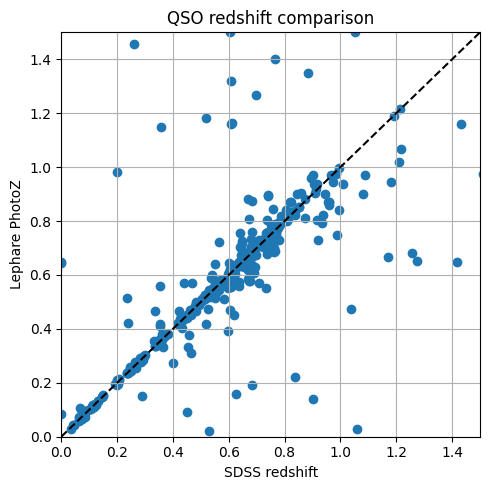

In [135]:
plt.figure(figsize=(5, 5))
plt.scatter(df['z_y'], df['PHOTOZ'])
plt.xlabel('SDSS redshift')
plt.ylabel('Lephare PhotoZ')
plt.plot([0, 1.5], [0, 1.5], 'k--')
plt.xlim(0, 1.5)
plt.ylim(0, 1.5)
plt.title('QSO redshift comparison')
plt.grid()
plt.tight_layout()
plt.savefig('./figs/qso_redshift_comparison.png')
plt.show()

# Load GAIA QSO candidates

In [15]:
query = """select
q.source_id, q.redshift_qsoc, q.qso_variability, q.zscore_qsoc,
g.ra, g.dec, g.pm, 	g.phot_g_mean_mag, g.bp_rp
from gaiadr3.qso_candidates as q
join gaiadr3.gaia_source as g on q.source_id=g.source_id
where 
g.ra >= 213.168920552 and g.ra <= 215.98586814
and g.dec >= 51.8180267143 and g.dec <= 53.5396054378"""

In [148]:
df_gaia = pd.read_csv('./data/gaia_qso.csv', comment='#')
df_gaia

source_id  redshift_qsoc  qso_variability  zscore_qsoc  \
0    1608091177880904320       4.388089              NaN     0.988158   
1    1608092552270481664       2.415113              NaN     0.407450   
2    1512007227551498752       0.188217              NaN     0.730529   
3    1608090971722476032       4.033927              NaN     0.434556   
4    1512007266207682176       1.510783        -0.470999     0.905852   
..                   ...            ...              ...          ...   
423  1604956234007918208       2.674262              NaN     0.988129   
424  1604910084582937472       2.255216              NaN     0.856061   
425  1604967705864787712       1.778923              NaN     0.947758   
426  1604910703058238848       0.550334              NaN     0.608648   
427  1608405195824999552       0.371871              NaN     0.857292   

             ra        dec        pm  phot_g_mean_mag     bp_rp  
0    213.185646  52.481056  1.402065        20.457397  0.500807  
1    213.195560  52.559772  2.638473        20.773850  0.219269  
2    213.195591  52.200644  1.330496        20.853690  1.000469  
3    213.199734  52.485109  4.828355        20.611185  0.170546  
4    213.200779  52.212115  0.228204        19.520796  0.540663  
..          ...        ...       ...              ...       ...  
423  215.941175  52.413728  3.591650        20.680084  0.380285  
424  215.948221  51.945010  4.126080        20.912130  0.534906  
425  215.957157  52.650982  0.551064        20.023312  0.617256  
426  215.957460  51.975084  1.948279        20.410612  0.646725  
427  215.959356  53.491467  2.388332        20.537128  0.590061  

[428 rows x 9 columns]

In [149]:
coord_jpas = SkyCoord(ra=df_jpas['ALPHA_J2000'], dec=df_jpas['DELTA_J2000'], unit=(u.deg, u.deg))
coord_gaia = SkyCoord(ra=df_gaia['ra'], dec=df_gaia['dec'], unit=(u.deg, u.deg))
idx, d2d, _ = coord_gaia.match_to_catalog_sky(coord_jpas)

df_gaia['idx'] = idx
df_gaia['d2d'] = d2d.arcsec
df_gaia

source_id  redshift_qsoc  qso_variability  zscore_qsoc  \
0    1608091177880904320       4.388089              NaN     0.988158   
1    1608092552270481664       2.415113              NaN     0.407450   
2    1512007227551498752       0.188217              NaN     0.730529   
3    1608090971722476032       4.033927              NaN     0.434556   
4    1512007266207682176       1.510783        -0.470999     0.905852   
..                   ...            ...              ...          ...   
423  1604956234007918208       2.674262              NaN     0.988129   
424  1604910084582937472       2.255216              NaN     0.856061   
425  1604967705864787712       1.778923              NaN     0.947758   
426  1604910703058238848       0.550334              NaN     0.608648   
427  1608405195824999552       0.371871              NaN     0.857292   

             ra        dec        pm  phot_g_mean_mag     bp_rp   idx  \
0    213.185646  52.481056  1.402065        20.457397  0.500807  4552   
1    213.195560  52.559772  2.638473        20.773850  0.219269   323   
2    213.195591  52.200644  1.330496        20.853690  1.000469  2410   
3    213.199734  52.485109  4.828355        20.611185  0.170546  4552   
4    213.200779  52.212115  0.228204        19.520796  0.540663  2410   
..          ...        ...       ...              ...       ...   ...   
423  215.941175  52.413728  3.591650        20.680084  0.380285  6648   
424  215.948221  51.945010  4.126080        20.912130  0.534906  6404   
425  215.957157  52.650982  0.551064        20.023312  0.617256  5024   
426  215.957460  51.975084  1.948279        20.410612  0.646725  9290   
427  215.959356  53.491467  2.388332        20.537128  0.590061   344   

             d2d  
0     761.074604  
1     943.008587  
2      87.595917  
3     751.689357  
4      93.324153  
..           ...  
423  1916.307669  
424  3096.502109  
425  1328.581703  
426  3036.859917  
427   699.160424  

[428 rows x 11 columns]

In [157]:
df_gaia_jpas = pd.merge(df_gaia, df_jpas, left_on='idx', right_index=True)
df_gaia_jpas

source_id  redshift_qsoc  qso_variability  zscore_qsoc  \
0    1608091177880904320       4.388089              NaN     0.988158   
1    1608092552270481664       2.415113              NaN     0.407450   
2    1512007227551498752       0.188217              NaN     0.730529   
3    1608090971722476032       4.033927              NaN     0.434556   
4    1512007266207682176       1.510783        -0.470999     0.905852   
..                   ...            ...              ...          ...   
423  1604956234007918208       2.674262              NaN     0.988129   
424  1604910084582937472       2.255216              NaN     0.856061   
425  1604967705864787712       1.778923              NaN     0.947758   
426  1604910703058238848       0.550334              NaN     0.608648   
427  1608405195824999552       0.371871              NaN     0.857292   

           ra_x      dec_x        pm  phot_g_mean_mag     bp_rp   idx  ...  \
0    213.185646  52.481056  1.402065        20.457397  0.500807  4552  ...   
1    213.195560  52.559772  2.638473        20.773850  0.219269   323  ...   
2    213.195591  52.200644  1.330496        20.853690  1.000469  2410  ...   
3    213.199734  52.485109  4.828355        20.611185  0.170546  4552  ...   
4    213.200779  52.212115  0.228204        19.520796  0.540663  2410  ...   
..          ...        ...       ...              ...       ...   ...  ...   
423  215.941175  52.413728  3.591650        20.680084  0.380285  6648  ...   
424  215.948221  51.945010  4.126080        20.912130  0.534906  6404  ...   
425  215.957157  52.650982  0.551064        20.023312  0.617256  5024  ...   
426  215.957460  51.975084  1.948279        20.410612  0.646725  9290  ...   
427  215.959356  53.491467  2.388332        20.537128  0.590061   344  ...   

                                                 FLAGS  \
0    1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
1    1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 ...   
2    2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 ...   
3    1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
4    2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 ...   
..                                                 ...   
423  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
424  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
425  0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 1 1 0 ...   
426  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
427  1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 ...   

                                         NORM_WMAP_VAL  \
0    0.0 0.949158788 0.0 0.0 0.0 0.188501343 0.0 0....   
1    0.0 0.918307722 0.270347416 0.0 0.0 0.18699131...   
2    0.511051059 0.887582958 0.314851344 0.92562085...   
3    0.0 0.949158788 0.0 0.0 0.0 0.188501343 0.0 0....   
4    0.511051059 0.887582958 0.314851344 0.92562085...   
..                                                 ...   
423  0.498703808 0.476431847 0.751761496 0.0 0.9660...   
424  0.0 0.0 0.0 0.476411045 0.0 0.0 0.0 0.0 0.0 0....   
425  0.510880411 0.477871954 0.759507775 0.48421180...   
426  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0....   
427  0.017950153 0.0 0.00783470552 0.479971409 0.92...   

                                            MASK_FLAGS  \
0    1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
1    1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
2    1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 ...   
3    1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
4    1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 1 ...   
..                                                 ...   
423  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
424  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
425  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
426  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   
427  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 ...   

                                         SINGLE_DETECT  \
0    0 0 0 0 0 0 0 0 0 0 0 0 781 0 0 0 0 0 0 958 0 .

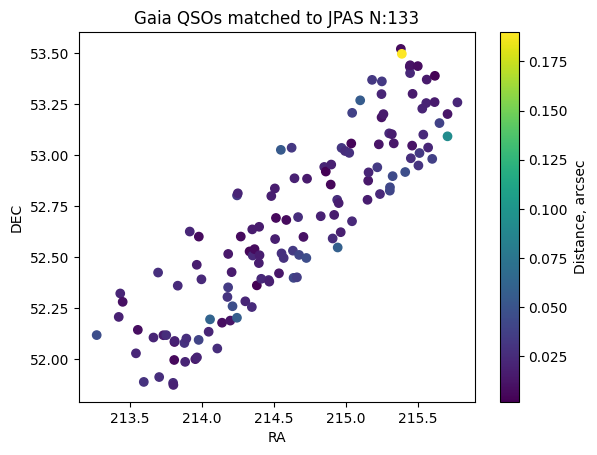

In [167]:
cond = df_gaia_jpas['d2d'] < 2

cb = plt.scatter(df_gaia_jpas.loc[cond, 'ra_x'], df_gaia_jpas.loc[cond, 'dec_x'], c=df_gaia_jpas.loc[cond, 'd2d'])
cbar = plt.colorbar(cb)
cbar.set_label('Distance, arcsec')
plt.title(f'Gaia QSOs matched to JPAS N:{len(df_gaia_jpas[cond])}')
plt.xlabel('RA')
plt.ylabel('DEC')
plt.savefig('./figs/gaia_qso_jpas.png')
plt.show()

In [168]:
coord_gaia = SkyCoord(df_gaia_jpas.loc[cond, 'ra_x'], df_gaia_jpas.loc[cond, 'dec_x'], 
                      unit=(u.deg, u.deg), frame='icrs')
idx, d2d, _ = coord_gaia.match_to_catalog_sky(coord_gaia, nthneighbor=2)

cond_double = d2d.arcsec < 10
coord_gaia_double = coord_gaia[cond_double]
coord_gaia_double

<SkyCoord (ICRS): (ra, dec) in deg
    []>

## Cuttout gaia andidates JPAS images

In [21]:
# ra, dec = 215.775215, 53.258066
for i, row in df_gaia_jpas[cond].iterrows():
    ra, dec = row['ALPHA_J2000'], row['DELTA_J2000']
    url = ("https://archive.cefca.es/catalogues/vo/siap/minijpas-pdr201912/get_graphic_cutout?band=RGB&" +
           f"ra={ra}&dec={dec}&width=0.002&height=0.002&sizex=100&sizey=100")
    while True:
       r = requests.get(url)
       if r.status_code == 200:
           break
       
    img = plt.imread(BytesIO(r.content))
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(f'./figs/gaia_qso/{row["source_id"]} RA: {ra:.4f} DEC: {dec:.4f}.png')
    plt.close()
    # break
    
# url = ("https://archive.cefca.es/catalogues/vo/siap/minijpas-pdr201912/get_graphic_cutout?band=RGB&" +
#        f"ra={ra}&dec={dec}&width=0.002&height=0.002&sizex=100&sizey=100")
       
# r = requests.get(url)
# r.status_code


## Make Gaia Mosaic

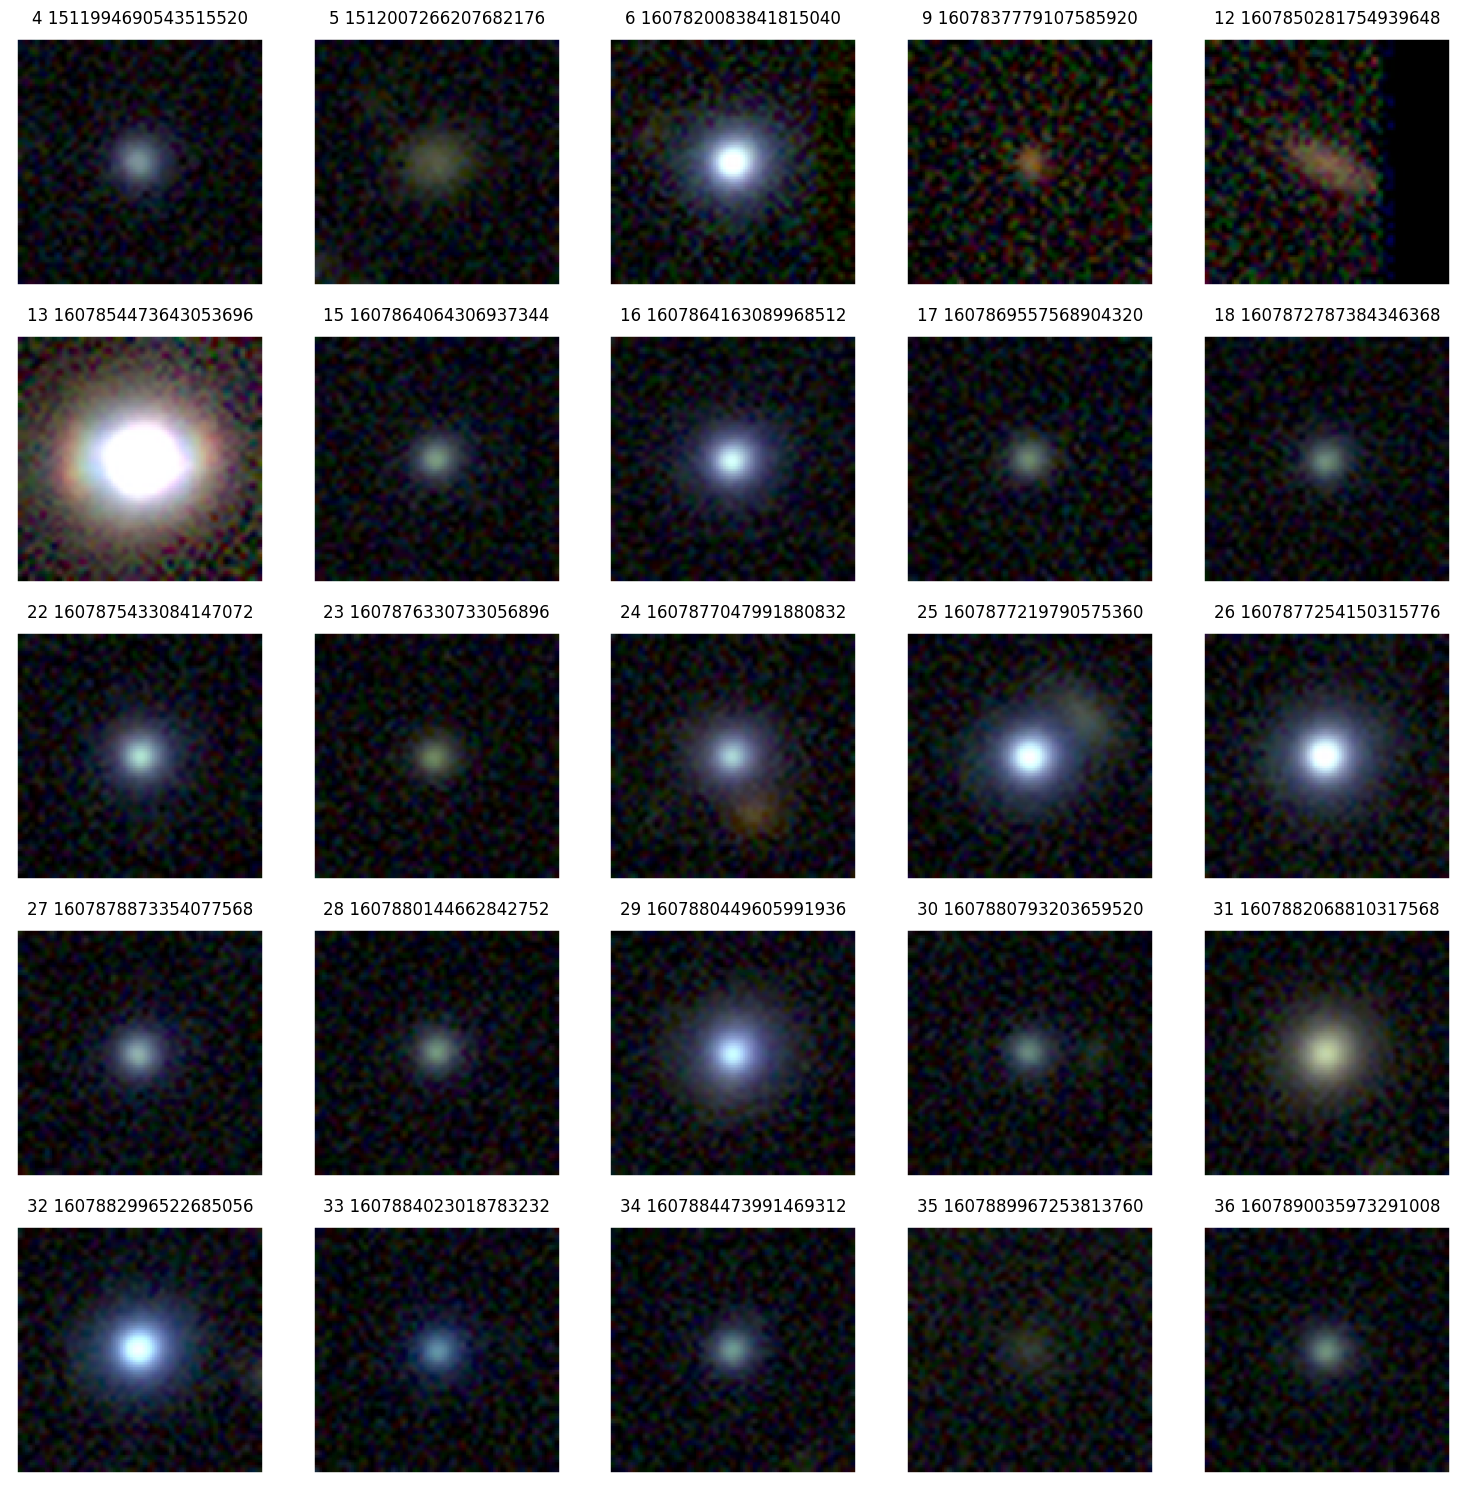

In [155]:
scan = os.scandir('./figs/gaia_qso/')
files = [f.path for f in scan if f.name.endswith('.png')]
files.sort()

bad_list = [0, 1, 2, 3, 7, 8, 10, 11, 14, 19, 20, 21]
fig, axs = plt.subplots(5, 5, figsize=(15, 15))
count = 0
for i, ax in enumerate(axs.flat):
    while count in bad_list:
        count += 1
    img = plt.imread(files[count])
    ax.imshow(img)
    # ax.hlines(75, 100, 200, 'w', lw=2)
    ax.axis('off')
    ax.title.set_text(f"{count} {files[count].split('/')[-1].split(' ')[0]}")
    # ax.title.set_text(f"JPAS id:{files[count].split('/')[-1].split(' ')[0]}")
    count += 1
plt.tight_layout()
plt.savefig('./figs/gaia_quasars.png')
plt.show()

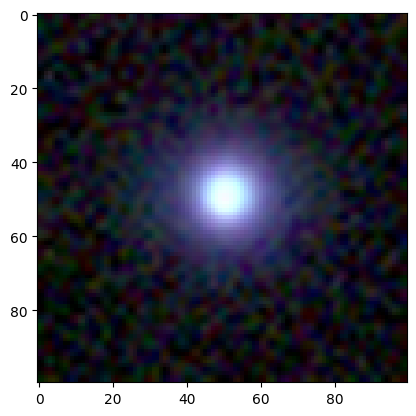

In [21]:
img = plt.imread(BytesIO(r.content))
plt.imshow(img)
plt.show()

# Known lenses

In [19]:
lenses = fits.open('data/lensedquasars.fits')[1].data
lenses

FITS_rec([(  2.83435  , -8.76430000e+00, 'J0011-0845', '1.7', '-', '1.89',  2, '15.1899995804', '14.4549999237'),
          (  3.348077 ,  5.13183000e+01, 'J0013+5119', '2.63', '-', '2.92',  2, '14.6770000458', '13.9200000763'),
          (  7.09369  ,  6.53170000e+00, 'PSJ0028+0631', '1.06', '-', '2.81',  2, '14.1599998474', '13.3629999161'),
          (  7.5636   , -1.54177000e+01, 'PSJ0030-1525', '3.36', 'measured', '1.78',  4, '14.3120002747', '13.7609996796'),
          ( 11.9465943,  2.52411000e+01, 'J0047+2514', '1.20', '-', '1.73',  2, '14.9420003891', '14.2690000534'),
          ( 12.6158   , -1.76693000e+01, 'HE0047-1756', '1.678', '0.407', '1.43',  2, '12.9110002518', '11.5860004425'),
          ( 13.4349   , -2.02091000e+01, 'DESJ0053-2012', '3.8', 'observed', '3.06',  4, '14.5620002747', '14.0120000839'),
          ( 15.69675  ,  2.47544000e+01, 'J0102+2445', '2.085', '0.272?', '2.38',  2, '14.1879997253', '13.5659999847'),
          ( 18.141188 , -1.68409550e+01, 'DESJ011

In [22]:
lenses['name']

chararray(['J0011-0845', 'J0013+5119', 'PSJ0028+0631', 'PSJ0030-1525',
           'J0047+2514', 'HE0047-1756', 'DESJ0053-2012', 'J0102+2445',
           'DESJ0112-1650', 'SDSSJ0114+0722', 'DESJ0115-5244',
           'PSJ0123-0455', 'J0124-0033', 'B0128+437', 'PMNJ0134-0931',
           'J0140-1152', 'PSJ0140+4107', 'Q0142-100', 'J0146-1133',
           'PSJ0147+4630', 'DESJ0150-4041', 'QJ0158-4325', 'J0203+1612',
           'WG0214-2105', 'OGLEJ0218-7335', 'B0218+357', 'J0228+3953',
           'HE0230-2130', 'J0235-2433', 'DESJ0245-0556', 'J0246-1845',
           'SDSSJ0246-0825', 'DESJ0247-6349', 'SDSSJ0248+1913',
           'SDSSJ0256+0153', 'J0259-2338', 'WISEJ0259-1635',
           'DESJ0340-2545', 'DESJ0405-3308', 'DESJ0407-5006',
           'DESJ0407-1931', 'DESJ0408-5354', 'MG0414+0534',
           'PSJ0417+3325', 'HE0435-1223', 'J0439+1634', 'B0445+123',
           'DESJ0501-4118', 'HE0512-3329', 'J0530-3730', 'DESJ0600-4649',
           'PSJ0630-1201', 'B0631+519', 'B0712+472'

In [27]:
for name in lenses['name']:
    if os.path.exists(f'./figs/lensed_quasars/{name}.png'):
        continue
    url = f"https://www.ast.cam.ac.uk/ioa/research/lensedquasars/indiv/cutouts/{name}_ds.png"
    r = requests.get(url)
    if r.status_code != 200:
        print(f"Error: {name}")
        continue
    img = plt.imread(BytesIO(r.content))
    plt.figure(figsize=(5, 5))
    plt.imshow(img)
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(f'./figs/lensed_quasars/{name}.png')
    plt.close()
# "https://www.ast.cam.ac.uk/ioa/research/lensedquasars/indiv/cutouts/J0011-0845_ds.png"
# "https://www.ast.cam.ac.uk/ioa/research/lensedquasars/indiv/cutouts/J0013+5119_ds.png"

Error: OGLEJ0218-7335
Error: PMNJ1838-3427
Error: CY2201-3201


## Mosaic

In [29]:
scan = os.scandir('./figs/lensed_quasars/')
files = [f.path for f in scan if f.name.endswith('.png')]
files.sort()
files

['./figs/lensed_quasars/2M1134-2103.png',
 './figs/lensed_quasars/2M1310-1714.png',
 './figs/lensed_quasars/A2213-2652.png',
 './figs/lensed_quasars/APM08279+5255.png',
 './figs/lensed_quasars/B0128+437.png',
 './figs/lensed_quasars/B0218+357.png',
 './figs/lensed_quasars/B0445+123.png',
 './figs/lensed_quasars/B0631+519.png',
 './figs/lensed_quasars/B0712+472.png',
 './figs/lensed_quasars/B0739+366.png',
 './figs/lensed_quasars/B0850+054.png',
 './figs/lensed_quasars/B1030+074.png',
 './figs/lensed_quasars/B1127+385.png',
 './figs/lensed_quasars/B1152+199.png',
 './figs/lensed_quasars/B1359+154.png',
 './figs/lensed_quasars/B1422+231.png',
 './figs/lensed_quasars/B1555+375.png',
 './figs/lensed_quasars/B1600+434.png',
 './figs/lensed_quasars/B1608+656.png',
 './figs/lensed_quasars/B1933+503.png',
 './figs/lensed_quasars/B1938+666.png',
 './figs/lensed_quasars/B2045+265.png',
 './figs/lensed_quasars/B2108+213.png',
 './figs/lensed_quasars/B2114+022*.png',
 './figs/lensed_quasars/B2319+

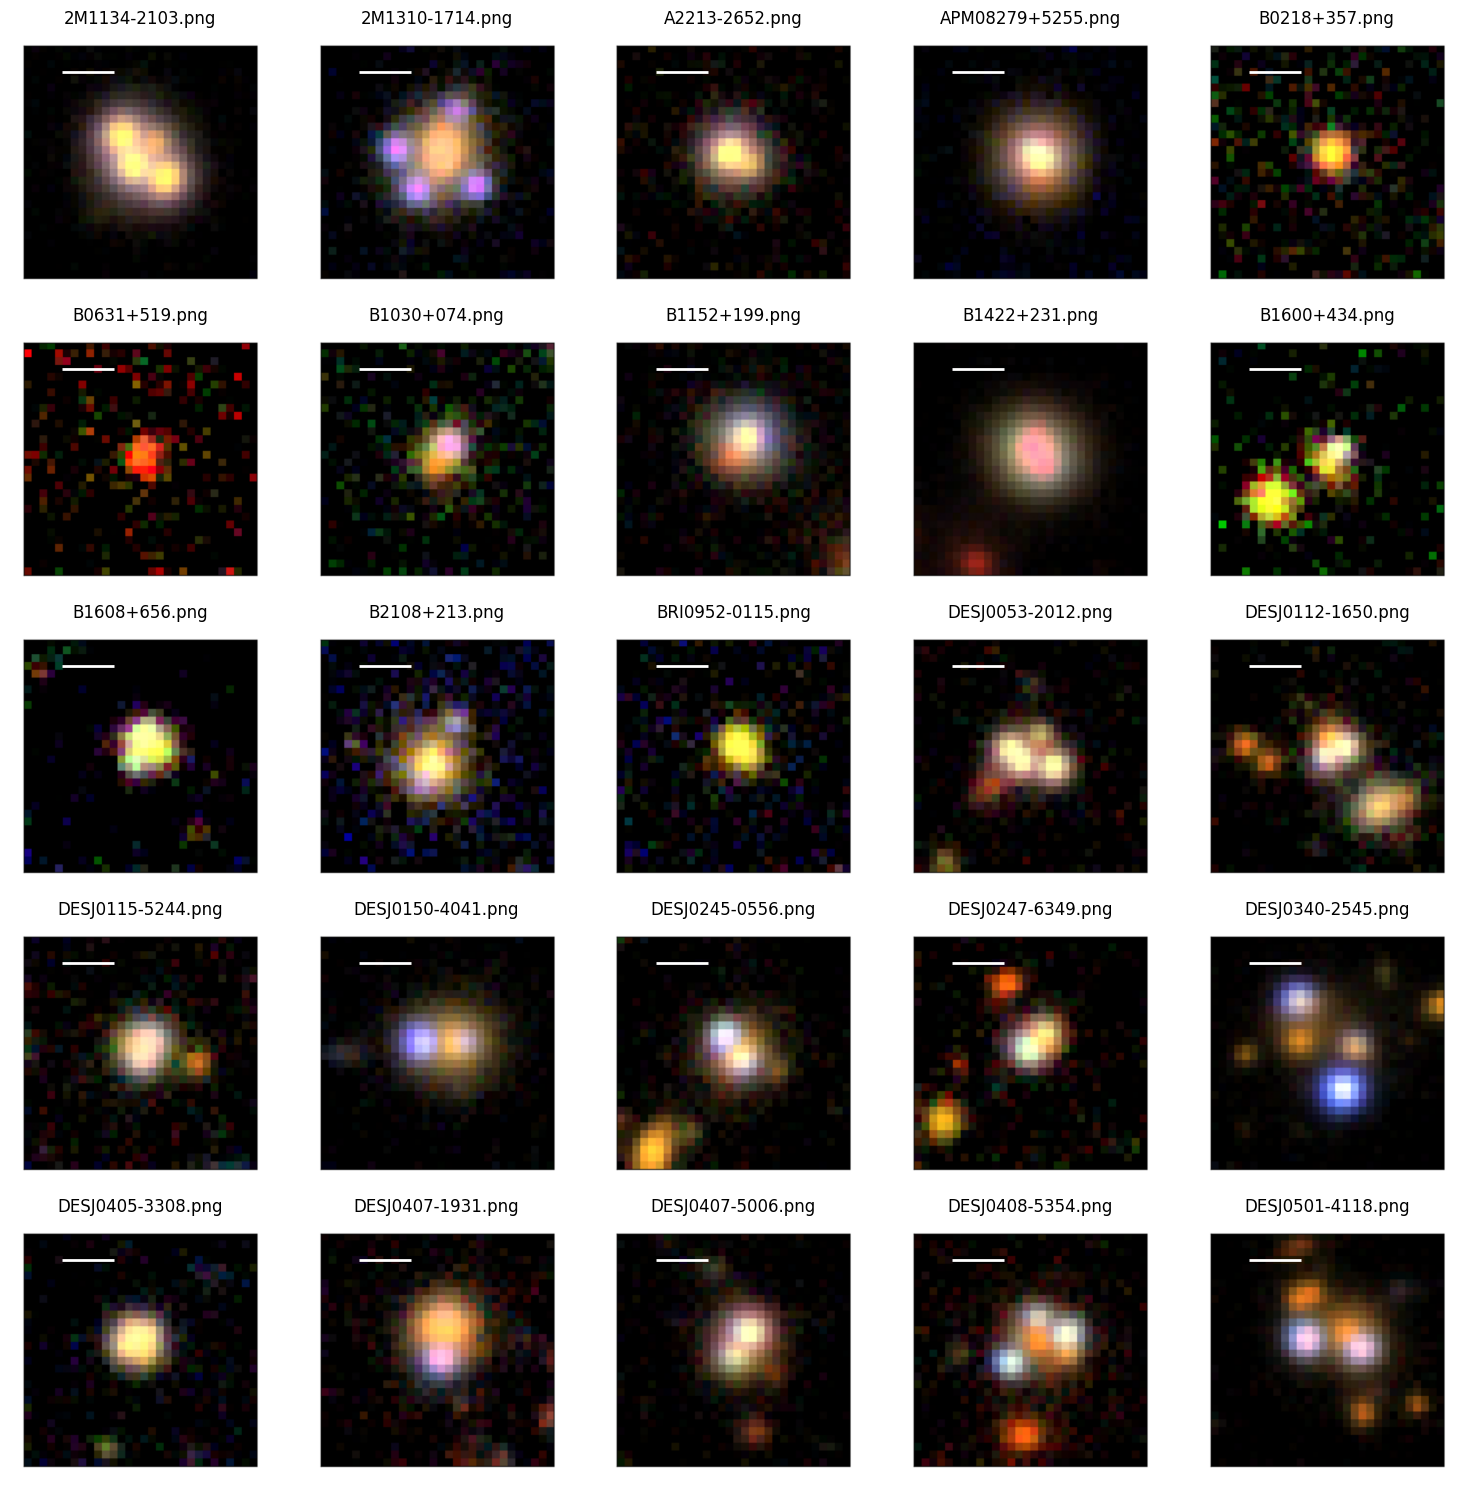

In [45]:
bad_list = [4, 6, 8, 9, 10, 12 ,14, 16, 19, 20, 21, 23, 24, 26]
fig, axs = plt.subplots(5, 5, figsize=(15, 15))
count = 0
for i, ax in enumerate(axs.flat):
    while count in bad_list:
        count += 1
    img = plt.imread(files[count])
    ax.imshow(img)
    ax.hlines(75, 100, 200, 'w', lw=2)
    ax.axis('off')
    ax.title.set_text(f"{files[count].split('/')[-1]}")
    count += 1
plt.tight_layout()
plt.savefig('./figs/lensed_quasars.png')
plt.show()

# Separation

In [53]:
np.array([float(x) for x in lenses['separation']])

array([ 1.89,  2.92,  2.81,  1.78,  1.73,  1.43,  3.06,  2.38,  1.38,
        1.7 ,  1.2 ,  2.  ,  1.98,  0.55,  0.68,  1.47,  1.44,  2.23,
        1.68,  3.26,  2.81,  1.22,  2.73,  1.85,  1.48,  0.34,  1.57,
        2.05,  2.04,  1.9 ,  1.  ,  1.1 ,  1.44,  1.76,  1.93,  2.92,
        1.63,  6.81,  1.57,  1.72,  2.52,  4.29,  2.4 ,  1.68,  2.54,
        0.2 ,  1.35,  3.72,  0.65,  1.04,  2.38,  1.9 ,  1.16,  1.46,
        1.54,  0.53,  1.03,  1.08,  1.49,  0.91,  1.15,  4.04,  2.24,
        2.55,  1.35,  0.38,  2.17,  2.74,  0.68,  2.84,  1.07,  0.98,
       14.  ,  3.25,  1.11,  1.89,  1.81,  5.37,  3.05,  2.6 ,  1.1 ,
        0.99,  1.  ,  6.17,  2.93,  1.54, 14.72,  1.54,  0.85,  1.16,
        1.59, 22.54,  1.65,  2.  ,  1.52,  1.27,  1.15,  3.19,  0.66,
        2.43,  0.78,  0.7 ,  1.7 ,  3.23,  1.4 ,  3.68,  1.44,  1.93,
        1.56,  3.03,  0.48,  1.49,  1.26,  2.43,  1.79,  1.56,  2.32,
        1.26,  1.86,  5.74,  1.22,  8.57,  2.  , 21.1 ,  1.44,  1.76,
        1.12,  0.84,

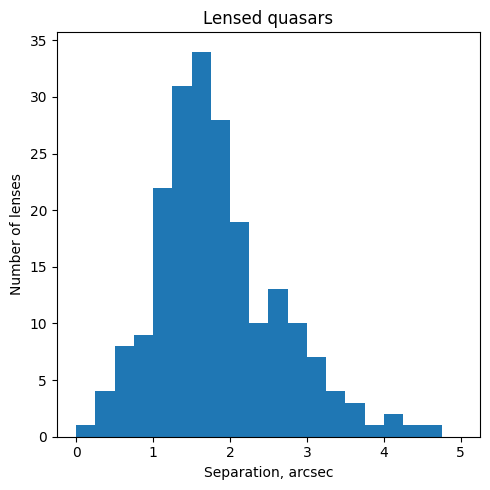

In [60]:
plt.figure(figsize=(5, 5))
separations = np.array([float(x) for x in lenses['separation']])
hist, bins = np.histogram(separations, bins=20, range=(0, 5))
w = bins[1] - bins[0]
plt.bar(bins[:-1] + w/2, hist, width=w, align='center')
plt.xlabel('Separation, arcsec')
plt.ylabel('Number of lenses')
plt.title('Lensed quasars')
plt.tight_layout()
plt.savefig('./figs/glq_separation_hist.png')
plt.show()

/tmp/ipykernel_67977/170733954.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(sky.ra.wrap_at(180*u.deg).radian,


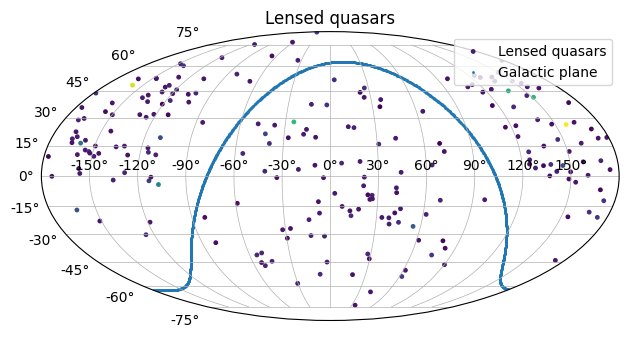

In [86]:
coords = SkyCoord(ra=lenses['ra'], dec=lenses['dec'], unit=(u.deg, u.deg))
fig = plt.figure()
ax = fig.add_subplot(111, projection='mollweide')
ax.scatter(coords.ra.wrap_at(180*u.deg).radian, coords.dec.radian,
           s=6, 
           c=separations, cmap='viridis',
           label='Lensed quasars')
# plot ecliptic and galactic plane
l = np.linspace(0, 2*np.pi, 1000)
galactic_plane = SkyCoord(l=l*u.rad, b=0*u.deg, frame='galactic')
sky = galactic_plane.transform_to('icrs')
ax.scatter(sky.ra.wrap_at(180*u.deg).radian, 
           sky.dec.radian, s=1, c=plt.cm.tab20(0), 
           label='Galactic plane')

ax.grid(True, lw=0.5)
# plt.colorbar()
plt.legend(loc='upper right')
plt.title('Lensed quasars')
plt.tight_layout()
plt.savefig('./figs/glq_sky_map.png')
plt.show()


# Brightness distribution

In [103]:
url = "https://www.ast.cam.ac.uk/ioa/research/lensedquasars/"
r = requests.get(url)
html_tables = pd.read_html(r.content)
df = html_tables[0]
df

ID            Name          RA        DEC     b  W1-W2  z qso    z lens  \
0      1      J0011-0845    2.834350  -8.764300 -69.0  0.734    1.7         -   
1      2      J0013+5119    3.348077  51.318300 -11.0  0.756   2.63         -   
2      3    PSJ0028+0631    7.093690   6.531700 -55.0  0.796   1.06         -   
3      4    PSJ0030-1525    7.563600 -15.417700 -77.0  0.551   3.36  measured   
4      5      J0047+2514   11.946594  25.241100 -37.0  0.673   1.20         -   
..   ...             ...         ...        ...   ...    ...    ...       ...   
215  216    PSJ2332-1852  353.080500 -18.868500 -70.0  0.957   1.49         -   
216  217  ULASJ2343-0050  355.799750  -0.842860 -59.0  0.961  0.787      0.3?   
217  218   WISE2344-3056  356.070600 -30.940560 -74.0  0.869  1.298     1.30?   
218  219   DESJ2349-4518  357.491900 -45.314700 -68.0  0.617   2.89         -   
219  220      J2350+3654  357.531433  36.909587 -24.0  0.533  2.085         -   

     sep.  N  ...       NED       SDSS DR14  Pan- STARRS  DECaLS  WISE  FIRST  \
0    1.89  2  ...  NED Link  SDSS DR14 Link      PS Link  DECaLS  WISE  FIRST   
1    2.92  2  ...  NED Link  SDSS DR14 Link      PS Link  DECaLS  WISE  FIRST   
2    2.81  2  ...  NED Link  SDSS DR14 Link      PS Link  DECaLS  WISE  FIRST   
3    1.78  4  ...  NED Link  SDSS DR14 Link      PS Link  DECaLS  WISE  FIRST   
4    1.73  2  ...  NED Link  SDSS DR14 Link      PS Link  DECaLS  WISE  FIRST   
..    ... ..  ...       ...             ...          ...     ...   ...    ...   
215  1.97  2  ...  NED Link  SDSS DR14 Link      PS Link  DECaLS  WISE  FIRST   
216  1.32  2  ...  NED Link  SDSS DR14 Link      PS Link  DECaLS  WISE  FIRST   
217  2.18  4  ...  NED Link  SDSS DR14 Link      PS Link  DECaLS  WISE  FIRST   
218  2.11  2  ...  NED Link  SDSS DR14 Link      PS Link  DECaLS  WISE  FIRST   
219  3.31  2  ...  NED Link  SDSS DR14 Link      PS Link  DECaLS  WISE  FIRST   

     Gaia  CFHT cutout  CFHT search                  Discovery  
0    Gaia  CFHT cutout  CFHT search          Lemon et al. 2018  
1    Gaia  CFHT cutout  CFHT search          Lemon et al. 2019  
2    Gaia  CFHT cutout  CFHT search          Lemon et al. 2018  
3    Gaia  CFHT cutout  CFHT search          Lemon et al. 2018  
4    Gaia  CFHT cutout  CFHT search          Lemon et al. 2019  
..    ...          ...          ...                        ...  
215  Gaia  CFHT cutout  CFHT search          Lemon et al. 2018  
216  Gaia  CFHT cutout  CFHT search        Jackson et al. 2008  
217  Gaia  CFHT cutout  CFHT search      Schechter et al. 2017  
218  Gaia  CFHT cutout  CFHT search          Lemon et al. 2019  
219  Gaia  CFHT cutout  CFHT search  Lemon et al. in prep 2019  

[220 rows x 27 columns]

In [104]:
df.columns


Index(['ID', 'Name', 'RA', 'DEC', 'b', 'W1-W2', 'z qso', 'z lens', 'sep.', 'N',
       'Gaia density', 'GDR1 count', 'GDR2 count', 'G1', 'G2', 'G3', 'G4',
       'NED', 'SDSS DR14', 'Pan- STARRS', 'DECaLS', 'WISE', 'FIRST', 'Gaia',
       'CFHT cutout', 'CFHT search', 'Discovery'],
      dtype='object')

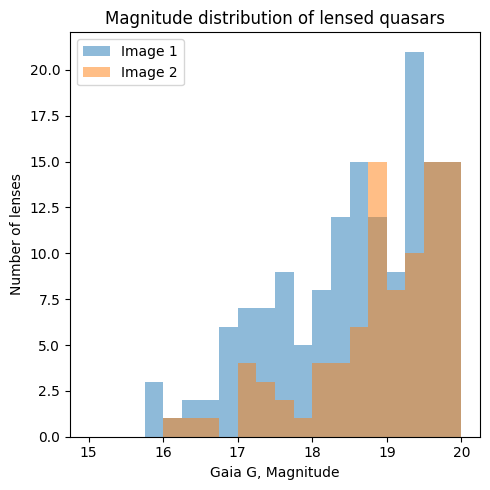

In [113]:
plt.figure(figsize=(5, 5))
hist, bins = np.histogram(df['G1'], bins=20, 
                          range=(15, 20),
                          )
w = bins[1] - bins[0]
plt.bar(bins[:-1] + w/2, hist, width=w, 
        align='center', alpha=0.5, label='Image 1')

hist, bins = np.histogram(df['G2'], bins=20, 
                          range=(15, 20),
                          )
plt.bar(bins[:-1] + w/2, hist, width=w, 
        align='center', alpha=0.5, label='Image 2')

plt.xlabel('Gaia G, Magnitude')
plt.ylabel('Number of lenses')
plt.title('Magnitude distribution of lensed quasars')
plt.legend()
plt.tight_layout()

plt.savefig('./figs/glq_mag_hist.png')
plt.show()